## **Understanding Time Series Trend**
#### **Deterministic trends vs stochastic trends, and how to deal with them**

Detecting and dealing with the trend is a key step in the modeling of time series.

In this article, we’ll:

- Describe what is the trend of a time series, and its different characteristics;
- Explore how to detect it;
- Discuss ways of dealing with trend;

### **Understanding Trend**

#### **Trend as a building block of time series**
At any given time, a time series can be decomposed into three parts: trend, seasonality, and the remainder.

$$
    \text {Time Series = Trend + Seasonality + Remainder}
$$

The trend represents the long-term change in the level of a time series. This change can be either upward (increase in level) or downward (decrease in level). If the change is systematic in one direction, then the trend is monotonic.

<center> <p>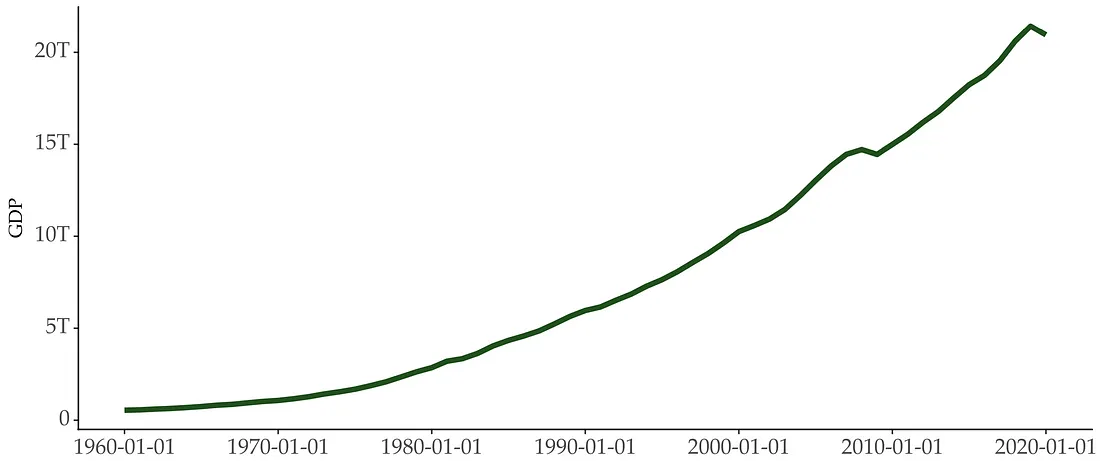</p> </center>

#### **Trend as a cause of non-stationarity**
A time series is stationary if its statistical properties do not change. This includes the level of the time series, which is constant under stationary conditions.

So, when a time series exhibits a trend, the stationarity assumption is not met. Modeling non-stationary time series is challenging. If untreated, statistical tests and forecasts can be misleading. This is why it’s important to detect and deal with the trend before modeling time series.

A proper characterization of the trend affects modeling decisions. This, further down the line, impacts forecasting performance.

#### **Deterministic Trends**
A trend can be either deterministic or stochastic.

Deterministic trends can be modeled with a well-defined mathematical function. This means that the long-term behavior of the time series is predictable. Any deviation from the trend line is only temporary.

In most cases, deterministic trends are linear and can be written as follows:



$$
    \text {trend = a + b} \cdot \text {time}
$$

But, trends can also follow an exponential or polynomial form.

$$
    \text {trend =} \exp^{a + b \cdot \text {time}}
$$

In the economy, there are several examples of time series that increase exponentially, such as GDP:

<center> <p>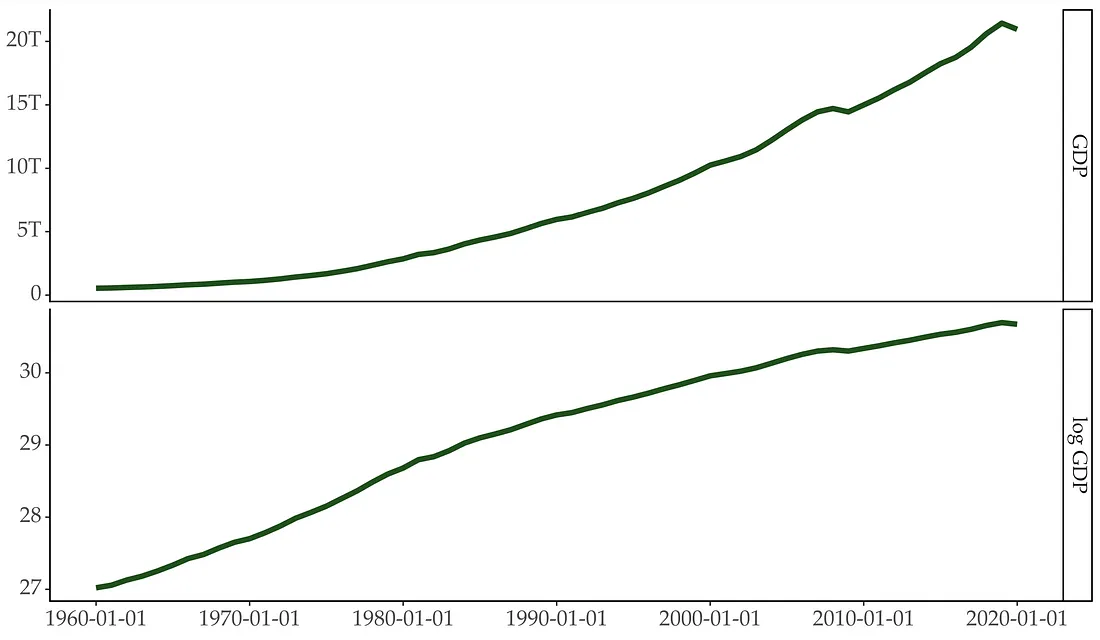</p> </center>

A time series with a deterministic trend is called trend-stationary. This means the series becomes stationary after removing the trend component.

Linear trends can also be modeled by including time as an explanatory variable. Here’s an example of how you could do this:

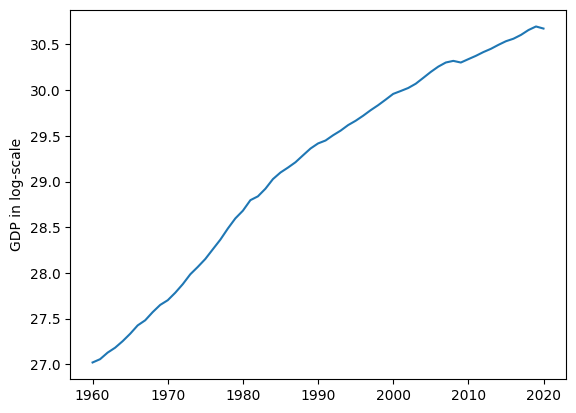

c:\Users\seung\anaconda3\envs\Dyn_Ensemble_for_TSA\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

series = pd.read_csv('../data/gdp-countries.csv')['United States']
series.index = pd.date_range(start='12/31/1959', periods=len(series), freq='Y')
series.dropna(inplace = True)

log_gdp = np.log(series)

linear_trend = np.arange(1, len(log_gdp) + 1)

plt.plot(log_gdp)
plt.ylabel('GDP in log-scale')
plt.show()

model = ARIMA(endog=log_gdp, order=(1, 0, 0), exog=linear_trend)
result = model.fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          United States   No. Observations:                   61
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 128.789
Date:                Thu, 06 Apr 2023   AIC                           -249.577
Time:                        13:50:09   BIC                           -241.134
Sample:                    12-31-1959   HQIC                          -246.268
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.0309      0.797     33.899      0.000      25.468      28.594
x1             0.0609      0.005     11.762      0.000       0.051       0.071
ar.L1          0.9900      0.024     41.869      0.000       0.944       1.036
sigma2         0.0008      0.000      6.079      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                  22.16   Jarque-Bera (JB):                 2.58
Prob(Q):                              0.00   Prob(JB):                         0.28
Heteroskedasticity (H):               1.04   Skew:                            -0.26
Prob(H) (two-sided):                  0.93   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

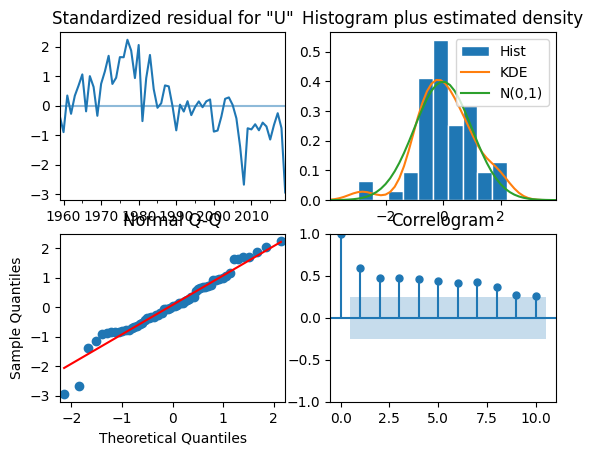

In [27]:
result.plot_diagnostics()
result.summary()

#### **Stochastic Trends**
A stochastic trend can change randomly, which makes their behavior difficult to predict.

A random walk is an example of a time series with a stochastic trend:



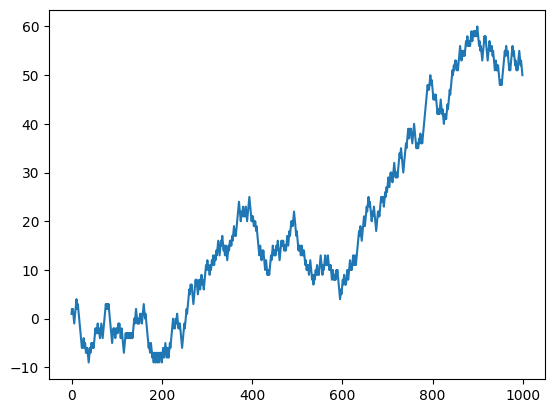

In [28]:
np.random.seed(1234)
rw = np.cumsum(np.random.choice([-1, 1], size=1000))

plt.plot(rw)
plt.show()

A random walk time series whose trend changes suddenly and unpredictably.

Stochastic trends are related to unit roots, integration, and differencing.

Time series with stochastic trends are referred to as difference-stationary. This means that the time series can be made stationary by differencing operations. Differencing means taking the difference between consecutive values.

Difference-stationary time series are also called integrated. For example, ARIMA (Auto-Regressive Integrated Moving Average) models contain a specific term (I) for integrated time series. This term involves applying differencing steps until the series becomes stationary.

Finally, difference-stationary or integrated time series are characterized by unit roots. Without going into mathematical details, a unit root is a characteristic of non-stationary time series.

#### **Forecasting Implications**
Deterministic and stochastic trends have different implications for forecasting.

Deterministic trends have a constant variance throughout time. In the case of a linear trend, this implies that the slope will not change. But, real-world time series show complex dynamics with the trend changing over long periods. So, long-term forecasting with deterministic trend models can lead to poor performance. The assumption of constant variance leads to narrow forecasting intervals that underestimate uncertainty.

<center> <p>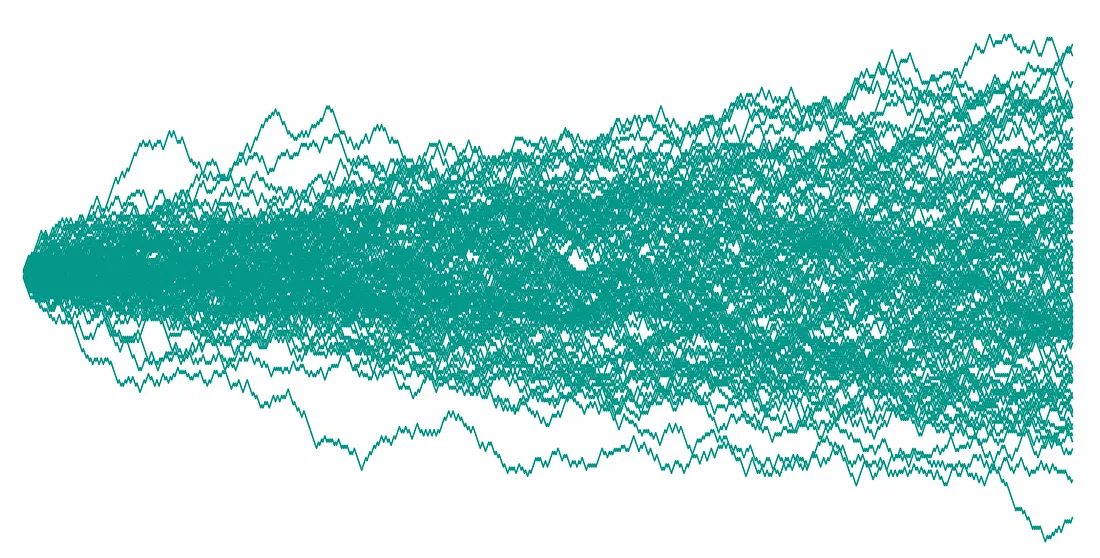</p> </center>

Stochastic trends are assumed to change over time. As a result, the variance of a time series increases across time. This makes stochastic trends better for long-term forecasting because they provide more reasonable uncertainty estimations.

#### **How to Detect Trend**
Stochastic trends can be detected using unit root tests. For example, the augmented Dickey-Fuller test, or the KPSS test.

#### **Augmented Dickey-Fuller (ADF) test**

The ADF test checks whether an auto-regressive model contains a unit root. The hypotheses of the test are:

- Null hypothesis: There is a unit root (the time series is not stationary);
- Alternative hypothesis: There’s no unit root.

This test is available in statsmodels:

In [21]:
from statsmodels.tsa.stattools import adfuller

pvalue_adf = adfuller(x=log_gdp, regression='ct')[1]

print(pvalue_adf)
# 1.0

1.0


The parameter `regression="ct"` is used to include a constant term and the deterministic trend in the model. As you can check in the documentation, there are four possible alternative values to this parameter:

- c: including a constant term (default value);
- ct: a constant term plus linear trend;
- ctt: constant term plus a linear and quadratic trend;
- n: no constant or trend.

**_Choosing which terms should be included is important._** A wrong inclusion or exclusion of a term can substantially reduce the power of the test. In our case, we used the ct option because the log GPD series shows a linear deterministic trend behavior.

#### **KPSS test**

The KPSS test can also be used to detect stochastic trends. The test hypotheses are opposite relative to ADF:

- Null hypothesis: the time series is trend-stationary;
- Alternative hypothesis: There is a unit root.

In [22]:
from statsmodels.tsa.stattools import kpss

pvalue_kpss = kpss(x=log_gdp, regression='ct')[1]

print(pvalue_kpss)
# 0.01

0.01


c:\Users\seung\anaconda3\envs\Dyn_Ensemble_for_TSA\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


The KPSS rejects the null hypothesis, while ADF doesn’t. So, both tests signal the presence of a unit root. Note that a time series can have a trend with both deterministic and stochastic components.

So, how can you deal with unit roots?

#### **How to Deal with Trend**
We’ve explored how to use time as an explanatory variable to account for a linear trend.

Another way to deal with trends is by differencing. Instead of working with the absolute values, you model how the time series changes in consecutive periods.

A single differencing operation is usually enough to achieve stationarity. Yet, sometimes you need to do this process many times. You can use ADF or KPSS to estimate the required number of differencing steps. The pmdarima library wraps this process in the function ndiffs:

In [23]:
from pmdarima.arima import ndiffs

# how many differencing steps are needed for stationarity?
ndiffs(log_gdp, test='adf')
# 2


2

In this case, the log GPD series needs 2 differencing steps for stationarity:

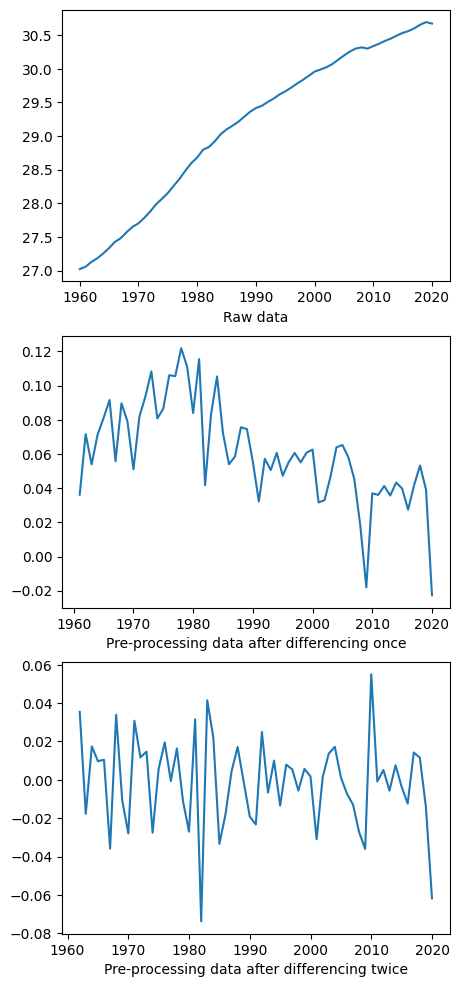

In [31]:
diff_log_gdp = log_gdp.diff().diff()
fig, axs = plt.subplots(3, 1, figsize = (5, 12))

axs[0].plot(log_gdp)
axs[0].set_xlabel('Raw data')
axs[1].plot(log_gdp.diff())
axs[1].set_xlabel('Pre-processing data after differencing once')
axs[2].plot(log_gdp.diff().diff())
axs[2].set_xlabel('Pre-processing data after differencing twice')
plt.show()

#### **Key Takeaways**
- The trend is a key time series component;
- Time series that exhibit a trend are non-stationary because the mean level is not constant;
- The trend of a time series can be deterministic or stochastic. Deterministic trends are modeled with well-defined mathematical functions, while stochastic trends can change randomly;
- Stochastic trends can be detected using unit root tests such as ADF or KPSS;
- Differencing operations are used to remove stochastic trends from a time series.

Thank you for reading, and see you in the next story!



#### **References**
[1] GDP Timeseries Data for various Countries (License: CC0: Public Domain)

[2] Stochastic and deterministic trends, in Forecasting: Principles and Practice

[3] A Random Walk — introduction and properties by Ben Lambert